In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [7]:
df=pd.read_csv("movies 2016.csv").dropna()
df.head()

,Rank,Title,Description,Runtime,Genre,Rating,Metascore,Votes,Gross_Earning,Director,Actor
0,2,Suicide Squad,A secret government agency recruits some of th...,123,Action,5.9,40.0,656097,325.10,David Ayer,Will Smith
1,3,Deadpool,A wisecracking mercenary gets experimented on ...,108,Action,8.0,65.0,958507,363.00,Tim Miller,Ryan Reynolds
2,4,Doctor Strange,While on a journey of physical and spiritual h...,115,Action,7.5,72.0,653299,232.60,Scott Derrickson,Benedict Cumberbatch
3,7,Busanhaeng,While a zombie virus breaks out in South Korea...,118,Action,7.6,72.0,194512,2.13,Sang-ho Yeon,Gong Yoo
4,8,Ghostbusters,"Following a ghost invasion of Manhattan, paran...",117,Action,6.5,60.0,215403,128.30,Paul Feig,Melissa McCarthy


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 0 to 99
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           89 non-null     int64  
 1   Title          89 non-null     object 
 2   Description    89 non-null     object 
 3   Runtime        89 non-null     int64  
 4   Genre          89 non-null     object 
 5   Rating         89 non-null     float64
 6   Metascore      89 non-null     float64
 7   Votes          89 non-null     int64  
 8   Gross_Earning  89 non-null     float64
 9   Director       89 non-null     object 
 10  Actor          89 non-null     object 
dtypes: float64(3), int64(3), object(5)
memory usage: 8.3+ KB


In [9]:
df.columns

Index(['Rank', 'Title', 'Description', 'Runtime', 'Genre', 'Rating',
       'Metascore', 'Votes', 'Gross_Earning', 'Director', 'Actor'],
      dtype='object')

In [10]:
df.isnull().sum()

Rank             0
Title            0
Description      0
Runtime          0
Genre            0
Rating           0
Metascore        0
Votes            0
Gross_Earning    0
Director         0
Actor            0
dtype: int64

In [11]:
df.describe()

,Rank,Runtime,Rating,Metascore,Votes,Gross_Earning
count,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000
mean,48.348315,114.955056,6.848315,59.730337,219889.853933,97.774719
std,29.427145,15.700253,0.787417,17.906172,181372.775579,117.679386
min,1.000000,81.000000,5.100000,18.000000,493.000000,0.070000
25%,23.000000,106.000000,6.300000,48.000000,96679.000000,14.270000
50%,46.000000,115.000000,7.000000,60.000000,173625.000000,54.770000
75%,73.000000,123.000000,7.400000,74.000000,257019.000000,126.600000
max,100.000000,161.000000,8.400000,99.000000,958507.000000,532.100000


In [13]:
#categorical variables
df.describe(include=['O']).T

,count,unique,top,freq
Title,89,89,Te Ata,1
Description,89,89,Based on the incredible true story of the Beam...,1
Genre,89,8,Action,39
Director,89,88,David Yates,2
Actor,89,80,Amy Adams,2


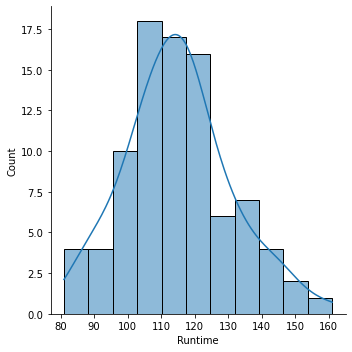

In [14]:
#visualization
#distribution of runtime
sns.displot(x='Runtime',data=df,kde=True)

In [15]:
#unique factors for rating
df['Rating'].unique()

array([5.9, 8. , 7.5, 7.6, 6.5, 7.8, 6.9, 5.4, 6.2, 6.4, 7.3, 7.4, 7.2,
       6.6, 6.8, 7. , 6.1, 6.3, 5.2, 7.1, 5.3, 5.7, 5.5, 5.8, 6.7, 7.9,
       8.4, 8.1, 5.1])

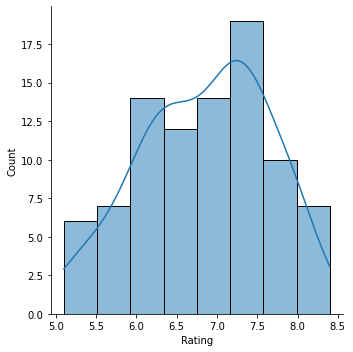

In [16]:
#distribution of rating
sns.displot(x='Rating',data=df,kde=True)

<AxesSubplot:xlabel='Genre', ylabel='count'>

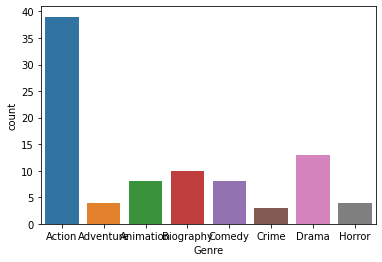

In [17]:
#distribution of categorical variable
sns.countplot(x='Genre',data=df)

In [18]:
df['Genre'].value_counts()

Action       39
Drama        13
Biography    10
Animation     8
Comedy        8
Adventure     4
Horror        4
Crime         3
Name: Genre, dtype: int64

<AxesSubplot:>

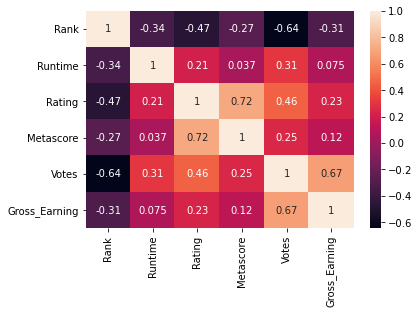

In [20]:
#correlation of the data
sns.heatmap(df.corr(),annot=True)

In [23]:
#data cleaning
#feature engineering
#dropping unimportant variables
df.drop(['Title','Description','Director','Actor'],axis=1,inplace=True)

In [24]:
df.head()

,Rank,Runtime,Genre,Rating,Metascore,Votes,Gross_Earning
0,2,123,Action,5.9,40.0,656097,325.10
1,3,108,Action,8.0,65.0,958507,363.00
2,4,115,Action,7.5,72.0,653299,232.60
3,7,118,Action,7.6,72.0,194512,2.13
4,8,117,Action,6.5,60.0,215403,128.30


In [26]:
#getting dummies for genre
df2=pd.get_dummies(df).reset_index(drop=True)
df2.head()

,Rank,Runtime,Rating,Metascore,Votes,Gross_Earning,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Biography,Genre_Comedy,Genre_Crime,Genre_Drama,Genre_Horror
0,2,123,5.9,40.0,656097,325.10,1,0,0,0,0,0,0,0
1,3,108,8.0,65.0,958507,363.00,1,0,0,0,0,0,0,0
2,4,115,7.5,72.0,653299,232.60,1,0,0,0,0,0,0,0
3,7,118,7.6,72.0,194512,2.13,1,0,0,0,0,0,0,0
4,8,117,6.5,60.0,215403,128.30,1,0,0,0,0,0,0,0


In [28]:
#modelling
#k means clustering
#determine the optimal number of clusters
#determine starting values for each cluster
X=df2.iloc[:,].values
X

array([[  2. , 123. ,   5.9, ...,   0. ,   0. ,   0. ],
       [  3. , 108. ,   8. , ...,   0. ,   0. ,   0. ],
       [  4. , 115. ,   7.5, ...,   0. ,   0. ,   0. ],
       ...,
       [ 35. , 134. ,   7.3, ...,   0. ,   0. ,   1. ],
       [ 48. , 117. ,   6.2, ...,   0. ,   0. ,   1. ],
       [ 96. , 102. ,   5.1, ...,   0. ,   0. ,   1. ]])

C:\Users\John\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


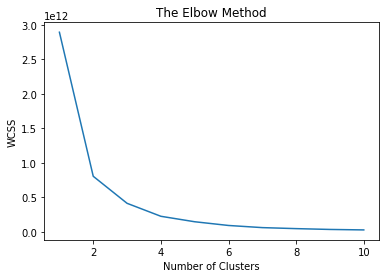

In [30]:
#using the elbow method to find optimal number of clusters
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [31]:
#fitting k-means to the dataset
kmeans=KMeans(n_clusters=5,init='k-means++',
             random_state=42)
y_kmeans=kmeans.fit_predict(X)
y_kmeans

array([4, 2, 4, 3, 3, 4, 3, 4, 0, 1, 3, 4, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3,
       3, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 1, 3, 1,
       3, 0, 3, 3, 3, 1, 3, 0, 3, 1, 3, 1, 3, 3, 1, 1, 1, 0, 3, 1, 1, 1,
       1, 1, 1, 3, 3, 1, 4, 3, 1, 1, 3, 0, 1, 1, 1, 1, 3, 3, 1, 0, 3, 1,
       1])

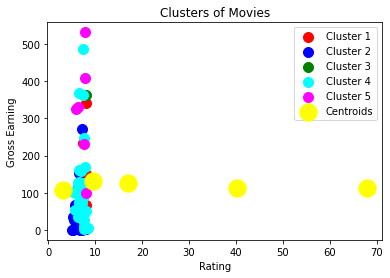

In [35]:
#visualizing the clusters
plt.scatter(X[y_kmeans==0,2],X[y_kmeans==0,5],s=100,c='red',
           label='Cluster 1')
plt.scatter(X[y_kmeans==1,2],X[y_kmeans==1,5],s=100,c='blue',
           label='Cluster 2')
plt.scatter(X[y_kmeans==2,2],X[y_kmeans==2,5],s=100,c='green',
           label='Cluster 3')
plt.scatter(X[y_kmeans==3,2],X[y_kmeans==3,5],s=100,c='cyan',
           label='Cluster 4')
plt.scatter(X[y_kmeans==4,2],X[y_kmeans==4,5],s=100,c='magenta',
           label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],s=300,c='yellow',
           label='Centroids')
plt.title('Clusters of Movies')
plt.xlabel('Rating')
plt.ylabel('Gross Earning')
plt.legend()
plt.show()

In [36]:
#hierarchical clustering
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',
                          linkage='ward')
y_hc=hc.fit_predict(X)

In [38]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rank             89 non-null     int64  
 1   Runtime          89 non-null     int64  
 2   Rating           89 non-null     float64
 3   Metascore        89 non-null     float64
 4   Votes            89 non-null     int64  
 5   Gross_Earning    89 non-null     float64
 6   Genre_Action     89 non-null     uint8  
 7   Genre_Adventure  89 non-null     uint8  
 8   Genre_Animation  89 non-null     uint8  
 9   Genre_Biography  89 non-null     uint8  
 10  Genre_Comedy     89 non-null     uint8  
 11  Genre_Crime      89 non-null     uint8  
 12  Genre_Drama      89 non-null     uint8  
 13  Genre_Horror     89 non-null     uint8  
dtypes: float64(3), int64(3), uint8(8)
memory usage: 5.0 KB


In [39]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rank             89 non-null     int64  
 1   Runtime          89 non-null     int64  
 2   Rating           89 non-null     float64
 3   Metascore        89 non-null     float64
 4   Votes            89 non-null     int64  
 5   Gross_Earning    89 non-null     float64
 6   Genre_Action     89 non-null     uint8  
 7   Genre_Adventure  89 non-null     uint8  
 8   Genre_Animation  89 non-null     uint8  
 9   Genre_Biography  89 non-null     uint8  
 10  Genre_Comedy     89 non-null     uint8  
 11  Genre_Crime      89 non-null     uint8  
 12  Genre_Drama      89 non-null     uint8  
 13  Genre_Horror     89 non-null     uint8  
dtypes: float64(3), int64(3), uint8(8)
memory usage: 5.0 KB


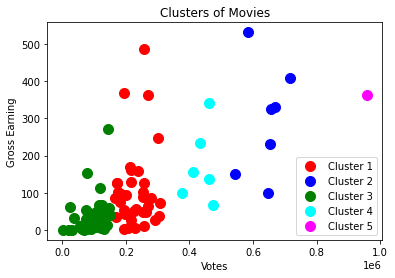

In [40]:
plt.scatter(X[y_hc==0,4],X[y_hc==0,5],s=100,c='red',
           label='Cluster 1')
plt.scatter(X[y_hc==1,4],X[y_hc==1,5],s=100,c='blue',
           label='Cluster 2')
plt.scatter(X[y_hc==2,4],X[y_hc==2,5],s=100,c='green',
           label='Cluster 3')
plt.scatter(X[y_hc==3,4],X[y_hc==3,5],s=100,c='cyan',
           label='Cluster 4')
plt.scatter(X[y_hc==4,4],X[y_hc==4,5],s=100,c='magenta',
           label='Cluster 5')
plt.title('Clusters of Movies')
plt.xlabel('Votes')
plt.ylabel('Gross Earning')
plt.legend()
plt.show()